# Zauner

## Initialization

In [1]:
] activate "/Users/sflammia/Dropbox/Github/Zaunerdev"

  Activating project at `~/Dropbox/Github/Zaunerdev`


In [2]:
using Revise

In [3]:
using Zauner

[ Info: Precompiling Zauner [ce1149fb-49fa-4541-ae6c-62019ae07d40]


In [4]:
using Serialization#, ProfileSVG, BenchmarkTools

In [5]:
AdmissibleTuple(4)
Q = map(x->QuadBin(x...), deserialize("../data/Q") )
dims = deserialize("../data/d")
# L = deserialize("../data/L")
# A = deserialize("../data/A")
# β = deserialize("../data/beta")
# ell = length.(psl2word.(A)) .- 1
# G = deserialize("../data/ghosts")
println("Import complete.")

Import complete.


In [11]:
include("../test/runtests.jl")

Test Summary:          | Pass  Total  Time
Zauner algebraic tests |   39     39  0.2s
Test Summary:         | Pass  Total  Time
Zauner analytic tests |   13     13  0.0s
Test Summary:         | Pass  Total  Time
Zauner quadform tests |   16     16  0.0s
Test Summary:        | Pass  Total  Time
Zauner SL(2,ℤ) tests |   45     45  0.0s
Test Summary:            | Pass  Total  Time
Zauner double sine tests |   34     34  8.0s
Test Summary:      | Pass  Total  Time
Zauner utils tests |   35     35  0.1s
Test Summary:      | Pass  Total   Time
Zauner ghost tests |   75     75  21.3s
Test Summary:               | Pass  Total  Time
Zauner precision_bump tests |    5      5  2.2s
Test Summary:       | Pass  Total  Time
Zauner galois tests |   14     14  0.2s


Test.DefaultTestSet("Zauner galois tests", Any[], 14, false, false, true, 1.708610599407601e9, 1.708610599571775e9, false, "/Users/sflammia/Library/CloudStorage/Dropbox/Github/Zauner/test/runtests.jl")

## Dev

In [30]:
Zauner.Vandermonde([4;15;6])\[4;15;6]

3-element Vector{Float64}:
 0.0
 1.0
 0.0

In [6]:
F=AdmissibleTuple(8)

AdmissibleTuple( d = 8, r = 1, K = ℚ(√5), q = 3, Q = ⟨1,-7,1⟩, h = 1 )

## Testing

In [28]:
setprecision(BigFloat,128)
kk = [2; 4; 5; 11; 20; 21; 26; 31; 32; 33; 76]
# 4, 31, 32 are anti-unitary
k = 9
d = dims[kk[k]]
q = Q[kk[k]]
F = AdmissibleTuple( d, q)

d = 15
# F15d = AdmissibleTuple(dims[20],Q[20]) # a singlet with fj/fQ = 1
# F15b = AdmissibleTuple(dims[21],Q[21]) # a singlet with fj/fQ = 2
# F15a = AdmissibleTuple(dims[22],Q[22]) # principal of the doublet with fj/fQ = 4
F15c = AdmissibleTuple(dims[23],Q[23]) # other part of a doublet with fj/fQ = 4
F = F15c

display(F)
@time ψ = ghost(F);


AdmissibleTuple( d = 25, r = 1, K = ℚ(√572), q = 1, Q = ⟨1,-24,1⟩, h = 2 )

  0.537248 seconds (5.91 M allocations: 217.294 MiB, 2.67% gc time)


In [143]:
k = 0
F = AdmissibleTuple(4);

This is the new way of doing it where I round into the class field $H$.

In [154]:
testbadness = true
while testbadness
    k += 1
    F = AdmissibleTuple(dims[k],Q[k])
    testbadness = 
        (rem(F.d,9) == 3 && rem(ZZ(F.f//F.q),3) == 0) || iseven(F.d)
end
display(F)

println("Computing ghost fiducial.")
sleep(.1)
@time ψ = ghost(F);


galorb = galois_orbit(F)

prec = 2F.h*ceil(Int,log(2,1+F.d))*length(galorb)

println("Galois orbit has length ",length(galorb),
        " and class number is $(F.h).")
println("Choosing $prec digits of precision.")
sleep(.1)

# z = re_im_proj(ψ) # represent as 2d-2 real coordinates
# precision_bump!( z, prec; base = 10, verbose = true);
# ψ = re_im_proj(z)
ψ = precision_bump( ψ, prec; base = 10, verbose = true);
ϕ = circshift(reverse(ψ),1)
ϕ .*= (F.d+1)/ϕ'ψ # include normalization factors

println("Is anti-unitary? ", is_antiunitary(F))
sleep(.1)

println("Computing relevant overlaps")
sleep(.1)
@time gnu = [ real(ϕ'WH(p,ψ)) for p in galorb]

psums = [sum(gnu.^k) for k=1:length(gnu)÷2]

println("Round into H and Galois conjugate")
sleep(.1)
@time t = Zauner.round_conj( F, psums)

c = Zauner.pow_to_elem_sym_poly(t .* [(-sqrt(BigInt(F.d+1)))^(-k) for k=1:length(t)])
c = [c; reverse(c)[2:end]];
setprecision(BigFloat,256)
println("Finding numerical roots for SIC phases")
sleep(.1)
@time θ = Zauner.AMRVW.roots(c)

println("All roots are phases?\n\n  ",all(abs2.(θ) .≈ 1.0),"\n\n",F)


AdmissibleTuple( d = 11, r = 1, K = ℚ(√24), q = 2, Q = ⟨1,-10,1⟩, h = 2 )

Computing ghost fiducial.
  0.827827 seconds (5.89 M allocations: 256.517 MiB, 3.18% gc time)
Galois orbit has length 40 and class number is 2.
Choosing 640 digits of precision.
Increase ghost precision...
Current ghost precision is 55 digits.
  0.013974 seconds (408.22 k allocations: 24.640 MiB, 39.03% gc time)
Current ghost precision is 109 digits.
  0.012324 seconds (408.22 k allocations: 33.930 MiB, 28.41% gc time)
Current ghost precision is 217 digits.
  0.015712 seconds (408.22 k allocations: 50.962 MiB, 22.62% gc time)
Current ghost precision is 433 digits.
  0.022778 seconds (408.22 k allocations: 88.124 MiB, 20.21% gc time)
Precision of BigFloat is now 866 digits.
Final ghost precision is 865 digits.
Is anti-unitary? false
Computing relevant overlaps
  0.076745 seconds (84.66 k allocations: 14.351 MiB, 41.43% compilation time)
Round into H and Galois conjugate
  0.100777 seconds (240.06 k allocations: 19.741 MiB, 7.08% gc time)
Finding numerical roots for SIC phases
  0.304370

In [156]:
real.(-im*log.(θ)/(2pi))

40-element Vector{BigFloat}:
 -0.4729344662043795936325919670704830450560865879205279596998115344911970745893781
  0.4729344662043795936325919670704830450560865879205279596998115344911970745893781
 -0.4655187035509468423520918160773106148634573878693968669010407636757481145499587
  0.4655187035509468423520918160773106148634573878693968669010407636757481145499587
 -0.4467666212195651053232966018662266238517903790449752883307415046492362179685618
  0.4467666212195651053232966018662266238517903790449752883307415046492362179685618
 -0.4297506315226102132911269620777988776906175677719450225208641390246108965833509
  0.4297506315226102132911269620777988776906175677719450225208641390246108965833509
 -0.3942061930091178985163782644244441789280882754158804160488895309887957638032117
  0.3942061930091178985163782644244441789280882754158804160488895309887957638032117
 -0.3911230213682981048252598151509757441752390528714770560861496059629783480874432
  0.3911230213682981048252598151509757441752390

This is the old way of doing it when I try to round into a quadratic field, but I power sum over the whole multiplet.

In [57]:
galorb = galois_orbit(F)

prec = F.h*ceil(Int,log(2,1+F.d))*length(galorb)

println("Galois orbit has length ",length(galorb),
        ", choosing $prec digits of precision.")

# z = re_im_proj(ψ) # represent as 2d-2 real coordinates
# precision_bump!( z, prec; base = 10, verbose = true);
# ψ = re_im_proj(z)
ψ = precision_bump( ψ, prec; base = 10, verbose = true);
ϕ = circshift(reverse(ψ),1)
ϕ .*= (F.d+1)/ϕ'ψ # include normalization factors

println("Is anti-unitary? ", is_antiunitary(F))

println("Computing relevant overlaps")
@time gnu = [ real(ϕ'WH(p,ψ)) for p in galorb]

s = Zauner.to_quadratic.([sum(gnu.^k) for k=1:length(gnu)÷2],F.D)
# small if a true integer relation was found
println("LLL log norm = ", norm(map(x -> floor(Int,log10(abs(x[1]))) , s)))

println("Evaluating the conjugate")
t = map( x -> (-x[2]+x[3]*sqrt(BigInt(F.D)))/x[1], s);
c = Zauner.pow_to_elem_sym_poly(t .* [(-sqrt(BigInt(F.d+1)))^(-k) for k=1:length(t)])
c = [c; reverse(c)[2:end]];
setprecision(BigFloat,256)
println("Finding numerical roots for SIC phases")
@time θ = Zauner.AMRVW.roots(c)

println("All roots are phases?\n",all(abs2.(θ) .≈ 1.0))


Galois orbit has length 48, choosing 384 digits of precision.
Increase ghost precision...
Current ghost precision is 31 digits.
  2.255390 seconds (6.76 M allocations: 426.845 MiB, 18.55% gc time, 99.00% compilation time)
Current ghost precision is 61 digits.
  0.032962 seconds (1.16 M allocations: 74.256 MiB, 52.05% gc time)
Current ghost precision is 121 digits.
  0.033069 seconds (1.16 M allocations: 100.632 MiB, 48.54% gc time)
Current ghost precision is 241 digits.
  0.032223 seconds (1.16 M allocations: 162.178 MiB, 22.46% gc time)
Precision of BigFloat is now 482 digits.
Final ghost precision is 481 digits.
Is anti-unitary? false
Computing relevant overlaps
  0.072306 seconds (264.25 k allocations: 24.437 MiB, 70.11% compilation time)
LLL log norm = 671.2436219436279
Evaluating the conjugate
Finding numerical roots for SIC phases
  0.883908 seconds (6.23 M allocations: 308.812 MiB, 5.94% gc time, 50.57% compilation time)
All roots are phases?
false


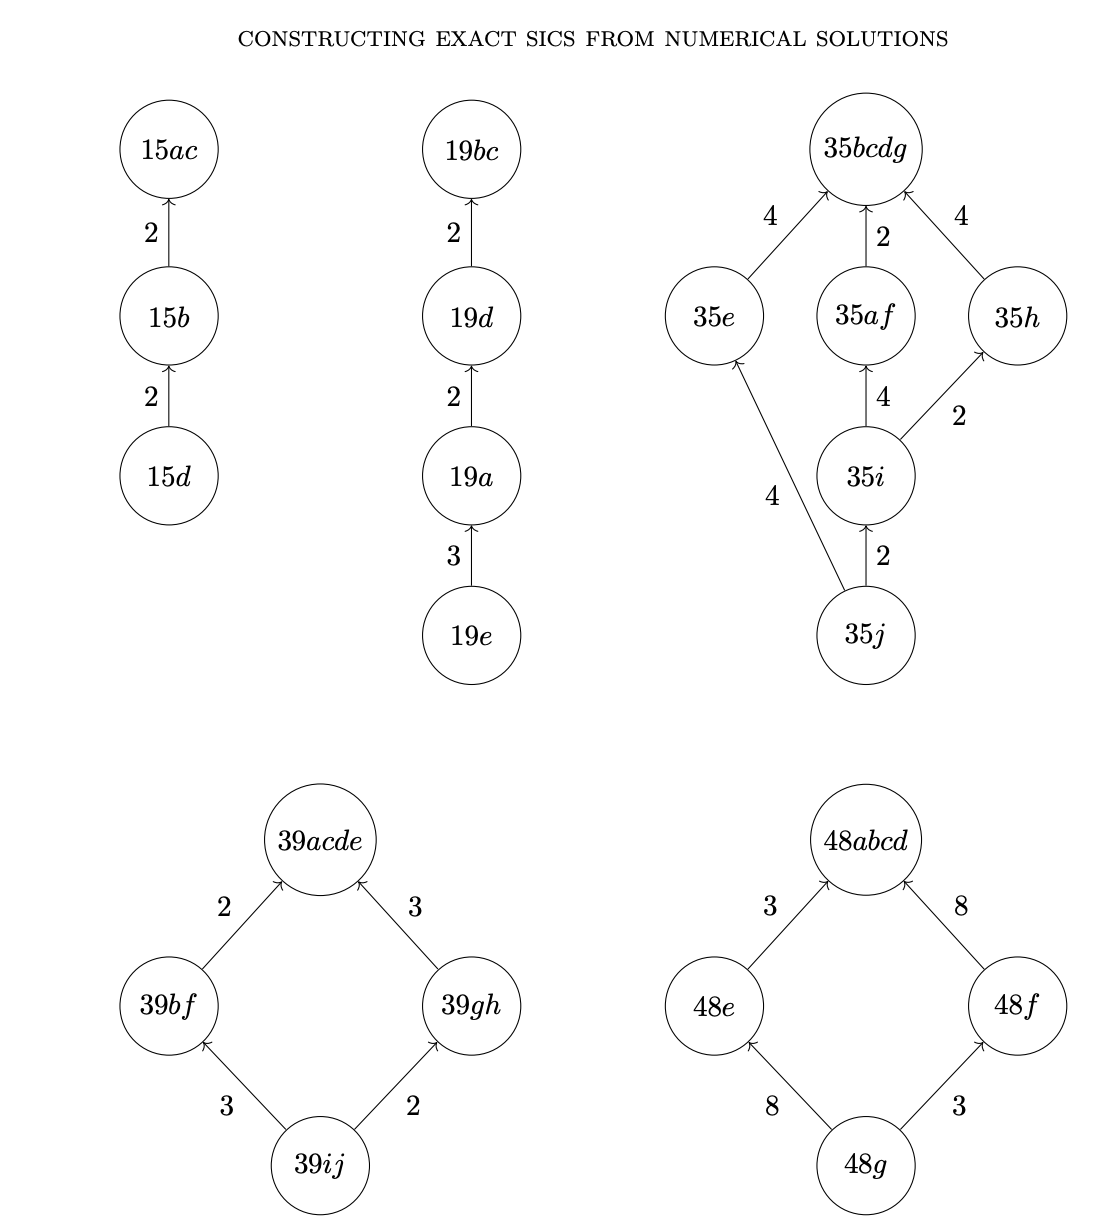

### Trying a multiplet "by hand"

In [20]:
d, q = map( n -> (dims[n], Q[n]), 8)
F = AdmissibleTuple(d,q) # half of a doublet for d = 9
display(F)
@time ψ = ghost(F);

AdmissibleTuple( d = 9, r = 1, K = ℚ(√60), 1, Q = ⟨1,-8,1⟩ )

  7.950879 seconds (65.33 M allocations: 4.055 GiB, 2.38% gc time)


In [22]:
galorb = galois_orbit(F)

h = Int(quadclassunit(Int(F.D//F.f^2))[1]) # class number

2

In [23]:
prec = 4h*ceil(Int,log(2,1+F.d))*length(galorb)

println("Galois orbit has length ",length(galorb),
        ", choosing $prec digits of precision.")

# z = re_im_proj(ψ) # represent as 2d-2 real coordinates
# precision_bump!( z, prec; base = 10, verbose = true);
# ψ = re_im_proj(z)
ψ = precision_bump( ψ, prec; base = 10, verbose = true);
ϕ = circshift(reverse(ψ),1)
ϕ .*= (F.d+1)/ϕ'ψ # include normalization factors

println("Is anti-unitary? ", is_antiunitary(F))

Galois orbit has length 18, choosing 576 digits of precision.
Increase ghost precision...
Current ghost precision is 111 digits.
  0.801907 seconds (2.33 M allocations: 157.274 MiB, 2.39% gc time, 99.59% compilation time)
Current ghost precision is 221 digits.
  0.004291 seconds (217.70 k allocations: 27.134 MiB)
Current ghost precision is 442 digits.
  0.023927 seconds (217.70 k allocations: 46.894 MiB, 64.13% gc time)
Precision of BigFloat is now 884 digits.
Final ghost precision is 883 digits.
Is anti-unitary? false


In [98]:
println("Computing relevant overlaps")
@time gnu = [ real(ϕ'WH(p,ψ)) for p in galorb]
psums = [sum(gnu.^k) for k=1:length(gnu)÷2];

Computing relevant overlaps
  0.031295 seconds (42.99 k allocations: 5.865 MiB, 57.15% compilation time)


In [111]:
Kx, x = K["x"]

(Univariate Polynomial Ring in x over K, x)

In [105]:
s = psums[4];

# build some field towers.
Qx, x = QQ["x"];
K, a = NumberField(x^2 - ZZ(F.D),"a")

Ky, y = K["y"]
# H, b = NumberField(pol, "b")

(Univariate Polynomial Ring in y over K, y)

In [106]:
# guess the factored part directly.
# that is, guess a polynomial of degree h with coefficents in K
c = Zauner.guess_algebraic_over_quadratic(s,h,F.D)
push!(c,0)
pol = sum((reshape(c,(h+1,2))*[one(a); a]) .* [ y^k for k=0:h])
factor(pol)

-1 * (y^2 + (-73800*a - 571500)*y + 4082400000*a + 31622130000)

In [107]:
# guess the abs. min. poly. and then factor it
c2 = Zauner.guess_algebraic(s,2h) 
pol2 = c2'*[x^k for k=0:2h]
display(pol2)
fac2 = factor(pol2,K)

x^4 - 1143000*x^3 + 63070110000*x^2 + 9639810000000*x - 279863100000000

1 * (x^2 + (-73800*a - 571500)*x + 4082400000*a + 31622130000) * (x^2 + (73800*a - 571500)*x - 4082400000*a + 31622130000)

In [91]:
fac2.fac

Dict{AbstractAlgebra.Generic.Poly{nf_elem}, Int64} with 2 entries:
  x^2 + (15//2*a - 45)*x - 135*a + 1080  => 1
  x^2 + (-15//2*a - 45)*x + 135*a + 1080 => 1

In [278]:
s = Zauner.guess_algebraic.(sqrt(BigFloat(F.D)),2h)

5-element Vector{BigInt}:
 -60
   0
   1
   0
   0

In [290]:
Zauner.guess_int_null_vec( 
    [one(BigFloat); sqrt(BigFloat(F.D)); 7+4*sqrt(BigFloat(F.D))]
)

3-element Vector{BigInt}:
 -7
 -4
  1

In [ ]:
# small if a true integer relation was found
println("LLL log norm = ", norm(map(x -> floor(Int,log10(abs(x[1]))) , s)))

println("Evaluating the conjugate")
t = map( x -> (-x[2]+x[3]*sqrt(BigInt(F.D)))/x[1], s);
c = Zauner.pow_to_elem_sym_poly(t .* [(-sqrt(BigInt(F.d+1)))^(-k) for k=1:length(t)])
c = [c; reverse(c)[2:end]];
setprecision(BigFloat,256)
println("Finding numerical roots for SIC phases")
@time θ = Zauner.AMRVW.roots(c)

println("All roots are phases?\n",all(abs2.(θ) .≈ 1.0))

In [221]:
dims[46], Q[46:49]
dims[8:9], Q[8:9]


([9, 9], QuadBin{ZZRingElem}[x^2 - 8*x*y + y^2, 5*x^2 - 10*x*y + 2*y^2])

In [46]:
F = AdmissibleTuple(dims[46], Q[46])

AdmissibleTuple( d = 23, r = 1, K = ℚ(√120), 1, Q = ⟨1,-22,1⟩ )

In [54]:
D = (F.d+1)*(F.d-3)
Δ,f = coredisc(D)
display((Δ,f))
_, a = quadratic_field(Δ)
ω = (D%4 + f*a)//2
# generate the quadratic order from the standard basis
Zω = Order([one(ω), ω])

println("Order is given by:\n  ",Zω,"\n")
cg, cm = class_group(Zω)
println("Class group of the order is:\n  ",(cg,cm),"\n")
# compute the class group and generator map
# cg, cm = picard_group(Zω)
pg, pm = picard_group(Zω)
println("Picard group of the order is:\n  ",(pg,pm),"\n")
# reduction(QuadBin(cm(gens(cg)[1])))

(120, 2)

Order is given by:
  Order of Real quadratic field defined by x^2 - 120
with Z-basis NfOrdElem[1, sqrt(120)]

Class group of the order is:
  (GrpAb: Z/2, ClassGroup map of 
Set of ideals of Zω
)

Picard group of the order is:
  (GrpAb: (Z/2)^2, Picard Group map of 
Set of ideals of Zω
)



In [154]:
F = AdmissibleTuple(9)
println(F)

D = (F.d+1)*(F.d-3)÷1
Δ,f = coredisc(D)
display((Δ,f))
_, a = quadratic_field(Δ)
ω = (D%4 + f*a)//2
# generate the quadratic order from the standard basis
Zω = Order([one(ω), ω])
println("Order is given by:\n  ",Zω,"\n\n--------\n")


pg, pm = picard_group(Zω)
println("Picard group is:\n  ",pg,"\n")
println("Elements are:\n", pm.(pg) )
println("As forms:")
display(reduction.(QuadBin.(pm.(pg))))

# println("\n--------\n")
# cg, cm = class_group(Zω)
# println("Class group is:\n  ",cg,"\n")
# println("Generators are:\n",gens(cg))
# println("Generators are:\n",[ cm(g) for g in gens(cg) ])
# reduction(QuadBin(cm(gens(cg)[1])))


AdmissibleTuple( d = 23, r = 1, K = ℚ(√120), f = 1, Q = ⟨1,-22,1⟩ )


(120, 2)

Order is given by:
  Order of Real quadratic field defined by x^2 - 120
with Z-basis NfOrdElem[1, sqrt(120)]

--------

Picard group is:
  GrpAb: (Z/2)^2

Elements are:
NfOrdIdl[Ideal of (Zω)
with basis matrix
[1 0; 0 1], Ideal of (Zω)
with basis matrix
[57 0; 33 1], Ideal of (Zω)
with basis matrix
[29 0; 2 1], Ideal of (Zω)
with basis matrix
[1653 0; 147 1]]
As forms:


4-element Vector{QuadBin{ZZRingElem}}:
 x^2 + 20*x*y - 20*y^2
 -7*x^2 + 12*x*y + 12*y^2
 -4*x^2 + 20*x*y + 5*y^2
 13*x^2 + 18*x*y - 3*y^2

In [218]:
Zauner.guess_algebraic(BigFloat(3)^(1/BigFloat(3))+BigFloat(3)^(2/BigFloat(3)),2)

3-element Vector{BigInt}:
 -589849553474396944841650177372651089432036255660583
  174719368381549603416539665878016040927750384288501
   -2060986329311871092129641387934536051174286616312

In [366]:
setprecision(BigFloat,128)
k = 8:9 # for d = 9
k = 12:13 # for d = 11
k = 16:17 # for d = 13
k = 22:23 # for d = 15
k = 27:28 # for d = 17
k = 34:35 # for d = 19
k = 44:45 # for d = 23 with class number 2
# the next example has some anomalies.
# k = 46:49 # for d = 23 with class number 4
# q = map( x-> QuadBin(x...),[ (1, -22, 1); (4, -28, 19); (3, -24, 8); (7, -30, 15) ])
q = Q[k]
d = dims[k[1]]
M = AdmissibleTuple.([])
V = Complex{BigFloat}.([])
for qq in q
    println("Computing ",qq)
    push!( M, AdmissibleTuple( d, qq) )
    @time push!( V, ghost(M[end]))
end
M
# d = 15
# F15a = AdmissibleTuple(dims[22],Q[22]) # principal of the doublet with fj/fQ = 4
# F15c = AdmissibleTuple(dims[23],Q[23]) # other part of a doublet with fj/fQ = 4

# d = 23
# Q = [ [1,-22,1], [19,-10,-5], [8,-24,3], [15,0,-8] ]
# F15a = AdmissibleTuple(dims[22],Q[22]) # principal of the doublet with fj/fQ = 4
# F15c = AdmissibleTuple(dims[23],Q[23]) # other part of a doublet with fj/fQ = 4


Computing 6*x^2 - 12*x*y + y^2
  6.098325 seconds (226.49 M allocations: 9.220 GiB, 24.84% gc time)
Computing 3*x^2 - 12*x*y + 2*y^2
  8.913388 seconds (353.33 M allocations: 14.428 GiB, 26.40% gc time)


2-element Vector{AdmissibleTuple}:
 AdmissibleTuple( d = 23, r = 1, K = ℚ(√120), 2, Q = ⟨6,-12,1⟩ )
 AdmissibleTuple( d = 23, r = 1, K = ℚ(√120), 2, Q = ⟨3,-12,2⟩ )

In [367]:
gnu = BigFloat[]
for k in 1:length(M)
    F = M[k]
    ψ = V[k]
    galorb = galois_orbit(F)
    prec = 1*length(M)*ceil(Int,log(2,1+F.d))*length(galorb)
    println("Galois orbit has length ",length(galorb),
        " in a multiplet with ",length(M)," elements; ",
        "choosing $prec digits of precision.")
    ψ = precision_bump( ψ, prec; base = 10, verbose = true);
    ϕ = circshift(reverse(ψ),1)
    ϕ .*= (F.d+1)/ϕ'ψ # include normalization factors

    println("Computing relevant overlaps")
    @time gnu = vcat(gnu , [ real(ϕ'WH(p,ψ)) for p in galorb] )
end

Galois orbit has length 176 in a multiplet with 2 elements; choosing 1760 digits of precision.
Increase ghost precision...
Current ghost precision is 24 digits.
  0.055885 seconds (4.06 M allocations: 198.151 MiB, 27.58% gc time)
Current ghost precision is 44 digits.
  0.061348 seconds (4.06 M allocations: 229.038 MiB, 34.76% gc time)
Current ghost precision is 84 digits.
  0.064380 seconds (4.06 M allocations: 290.813 MiB, 31.23% gc time)
Current ghost precision is 164 digits.
  0.080390 seconds (4.06 M allocations: 445.249 MiB, 25.43% gc time)
Current ghost precision is 324 digits.
  0.121463 seconds (4.06 M allocations: 692.347 MiB, 19.08% gc time)
Current ghost precision is 644 digits.
  0.212228 seconds (4.06 M allocations: 1.189 GiB, 12.66% gc time)
Current ghost precision is 1284 digits.
  0.395293 seconds (4.06 M allocations: 2.305 GiB, 10.35% gc time)
Precision of BigFloat is now 2568 digits.
Final ghost precision is 2564 digits.
Computing relevant overlaps
  2.526407 seconds 

In [368]:
s = Zauner.to_quadratic.([sum(gnu.^k) for k=1:length(gnu)÷2],F.D)
# small if a true integer relation was found
println("LLL log norm = ", norm(map(x -> floor(Int,log10(abs(x[1]))) , s)))

println("Evaluating the conjugate")
t = map( x -> (-x[2]+x[3]*sqrt(BigInt(F.D)))/x[1], s);
c = Zauner.pow_to_elem_sym_poly(t .* [(-sqrt(BigInt(F.d+1)))^(-k) for k=1:length(t)])
c = [c; reverse(c)[2:end]];
setprecision(BigFloat,256)
println("Finding numerical roots for SIC phases")
@time θ = Zauner.AMRVW.roots(c)

println("All roots are phases?\n",all(abs2.(θ) .≈ 1.0))

LLL log norm = 0.0
Evaluating the conjugate
Finding numerical roots for SIC phases
 16.550252 seconds (217.75 M allocations: 10.076 GiB, 4.86% gc time)
All roots are phases?
true


## Scratch

### table

\begin{tabular}{>{$}c<{$}>{$}c<{$}>{$}c<{$}>{$}c<{$}>{$}c<{$}}
\toprule
d & \Delta_0 & Q & A$ & \ell(A) \\
\midrule
\bottomrule
\end{tabular}

In [45]:
dim = 1
fval = 0
for j=1:10
    print(( d[j]==dim ? "" : d[j]),"&")
    print(( d[j]==dim ? "" : del[j]),"&")
    print(( d[j]==dim && fs[j] == fval ? "" : fs[j]),"&")
    print("\\langle",Q[j].a,",",Q[j].b,",",Q[j].c,"\\rangle&")
    print("\\smt{",L[j][1,1],"&",L[j][1,2],"\\\\",L[j][2,1],"&",L[j][2,2])
    print("}^{",n[j],"}&")
    println(ell[j],"\\\\")
    dim = d[j]
    fval = fs[j]
end

4&5&1&\langle1,-3,1\rangle&\smt{3&-1\\1&0}^{3}&4\\
5&12&1&\langle1,-4,1\rangle&\smt{4&-1\\1&0}^{3}&4\\
6&21&1&\langle1,-5,1\rangle&\smt{5&-1\\1&0}^{3}&4\\
7&8&1&\langle2,-4,1\rangle&\smt{7&-2\\4&-1}^{3}&7\\
&&2&\langle1,-6,1\rangle&\smt{6&-1\\1&0}^{3}&4\\
8&5&1&\langle1,-3,1\rangle&\smt{3&-1\\1&0}^{6}&7\\
&&3&\langle1,-7,1\rangle&\smt{7&-1\\1&0}^{3}&4\\
9&60&1&\langle1,-8,1\rangle&\smt{8&-1\\1&0}^{3}&4\\
&&&\langle5,-10,2\rangle&\smt{9&-2\\5&-1}^{3}&7\\
10&77&1&\langle1,-9,1\rangle&\smt{9&-1\\1&0}^{3}&4\\


In [32]:
fs = sqrt.(discriminant.(Q)./del)

3292-element Vector{ZZRingElem}:
 1
 1
 1
 1
 2
 1
 3
 1
 1
 1
 1
 2
 2
 ⋮
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1

In [38]:
dlast = 3
flast = 0
for j =1:6
    # (println()
    println("d = ",d[j],", f = ",fs[j])
end

d = 4, f = 1
d = 5, f = 1
d = 6, f = 1
d = 7, f = 1
d = 7, f = 2
d = 8, f = 1


In [90]:
dim = findfirst(d.==99)-1
fval = 0

for j=(dim+1):(dim+32) # 628
    print(( d[j]==dim ? "" : d[j]),"&")
    print(( d[j]==dim ? "" : del[j]),"&")
    # print(( d[j]==dim && fs[j] == fval ? "" : fs[j]),"&")
    print(fs[j],"&")
    print("\\langle",Q[j].a,",",Q[j].b,",",Q[j].c,"\\rangle&")
    print("\\smt{")
        print(L[j][1,1],"&",L[j][1,2],"\\\\",L[j][2,1],"&",L[j][2,2])
    print("}^{",n[j],"}&")
    println(ell[j],"\\\\")
    dim = d[j]
    fval = fs[j]
end

99&24&1&\langle3,-6,1\rangle&\smt{11&-2\\6&-1}^{6}&13\\
&&2&\langle1,-10,1\rangle&\smt{10&-1\\1&0}^{6}&7\\
&&2&\langle3,-12,4\rangle&\smt{11&-4\\3&-1}^{6}&13\\
&&4&\langle4,-20,1\rangle&\smt{99&-5\\20&-1}^{3}&7\\
&&4&\langle3,-24,16\rangle&\smt{109&-80\\15&-11}^{3}&19\\
&&5&\langle19,-26,1\rangle&\smt{101&-4\\76&-3}^{3}&13\\
&&5&\langle23,-28,2\rangle&\smt{105&-8\\92&-7}^{3}&25\\
&&10&\langle25,-50,1\rangle&\smt{99&-2\\50&-1}^{3}&7\\
&&10&\langle8,-56,23\rangle&\smt{105&-46\\16&-7}^{3}&16\\
&&10&\langle19,14,-29\rangle&\smt{35&58\\38&63}^{3}&10\\
&&10&\langle43,-54,3\rangle&\smt{103&-6\\86&-5}^{3}&19\\
&&20&\langle1,-98,1\rangle&\smt{98&-1\\1&0}^{3}&4\\
&&20&\langle47,24,-48\rangle&\smt{37&48\\47&61}^{3}&16\\
&&20&\langle4,-100,25\rangle&\smt{99&-25\\4&-1}^{3}&7\\
&&20&\langle32,48,-57\rangle&\smt{25&57\\32&73}^{3}&16\\
&&20&\langle67,-102,3\rangle&\smt{100&-3\\67&-2}^{3}&10\\
&&20&\langle19,-104,16\rangle&\smt{101&-16\\19&-3}^{3}&13\\
&&20&\langle75,0,-32\rangle&\smt{49&32\\75&49}^{3}

In [119]:
ψ = G[collect(keys(G))[2]]
ϕ = circshift(reverse(ψ),1)
gho = ψ*ϕ'/ϕ'ψ

15×15 Matrix{Complex{BigFloat}}:
    0.396569+0.0im         …   -0.0508909-0.0353529im
  -0.0508909+0.0353529im       0.00968234+0.0im
  -0.0174056-0.0147181im      0.000921556+0.0034404im
 0.000299359-0.0167062im      -0.00152773+0.00211719im
   0.0113766-0.0144294im      -0.00274628+0.000837506im
   0.0234369-0.0114146im   …  -0.00402519-0.000624517im
   0.0427881-0.00833657im      -0.0062341-0.00274462im
   0.0800422-0.00938737im      -0.0111085-0.00593086im
    0.152467-0.0348105im        -0.022669-0.00912479im
     0.26457-0.149684im        -0.0472957-0.00437693im
    0.310927-0.471528im    …    -0.081936+0.032792im
  -0.0696168-0.950425im        -0.0757938+0.128172im
    -1.08551-0.837035im         0.0646825+0.204185im
    -1.43209+0.560746im          0.233767+0.0557074im
   0.0429102+1.15442im          0.0974068-0.15197im

In [107]:
ψ = G[collect(keys(G))[24]]
ϕ = circshift(reverse(ψ),1)
gho = ψ*ϕ'/ϕ'ψ

5×5 Matrix{Complex{BigFloat}}:
   0.570691+0.0im        0.271749-0.468075im  …  -0.0585284-0.188152im
 -0.0585284+0.188152im    0.12645+0.137598im      0.0680346+0.0im
  -0.090294+0.15332im   0.0827558+0.147066im      0.0598086+0.0140451im
 -0.0555661+0.295591im   0.215982+0.186328im       0.103153-0.0119953im
   0.271749+0.468075im   0.513311+0.0im             0.12645-0.137598im

In [122]:
unu = sort([real(tr(gho*WH(m,n,15)')) for m=0:14, n=0:14][1:3:end])


75-element Vector{BigFloat}:
 -11.09296704582979204692217761707241810666135276731494603411032754050987070094681
 -10.72407548585087663994604286052945487902637476418059906614453899388424131774683
  -6.536707968094521837705268223028307530297090222116964492255856875901763197722014
  -6.536707968094521837705268223028307530297090222116964492254779003572985853572654
  -6.536707968094521837705268223028307530297090222116964492254033205097570589683895
  -2.370565965521635376909904078131624929282698747464525571608915944857636736110078
  -2.123368589173528020248255511016516725639177599344395742802718466985187985841825
  -1.663190300855761687862539627804923055574974933542748274013137456334158171174674
  -1.260408700848547197622959605686063540710993546252970245113708093161482593612216
  -0.04958709024931596674211004023123942465992598351122027712413924283289684797287717
  -0.03757838172086613337716603518969668582637140437431638485473295412423109705330296
  -0.0294343621350858710528981709698467767524

In [128]:
uunu = [unu[1]]
for k=2:length(unu)
    if unu[k] - unu[k-1] > 1e-50
        append!(uunu,unu[k])
    end
end
print("{")
for j in uunu
    println(j,",")
end

{-11.09296704582979204692217761707241810666135276731494603411032754050987070094681,
-10.72407548585087663994604286052945487902637476418059906614453899388424131774683,
-6.536707968094521837705268223028307530297090222116964492255856875901763197722014,
-2.370565965521635376909904078131624929282698747464525571608915944857636736110078,
-2.123368589173528020248255511016516725639177599344395742802718466985187985841825,
-1.663190300855761687862539627804923055574974933542748274013137456334158171174674,
-1.260408700848547197622959605686063540710993546252970245113708093161482593612216,
-0.04958709024931596674211004023123942465992598351122027712413924283289684797287717,
-0.03757838172086613337716603518969668582637140437431638485473295412423109705330296,
-0.02943436213508587105289817096984677675248131616322561164723367520956766677802519,
-0.02636501194610168844479344497975966711143664706228189833429341045442515001512631,
-0.009561387827796598921199332796110836478280576740490733877164779523255245725

In [117]:
[ sum(unu.^k) for k=0:7 ]

8-element Vector{BigFloat}:
 8.0
 1.943375672974064411272871951254893639119004378175317189964445072394642781901082
 2.776709006307397744606205284588226972452337711508650523307482122324117936286195
 0.9811252243246881370909573170849645463730014593917723965956887775683858115512661
 1.878917115316042940848581300836595759412669585450211459946115371857567075211606
 0.7620487980483512253535755420152482330886123272709214415785456751760891440930563
 1.453169317968513687117917457108928301040983670569140076403768943292062583375196
 0.6720777020773297248316833220497438979442139764294715716531369439483704375668724

println("""        <tr>""")
println("""          <td data-title="d">""",( d[j]==dim ? "" : d[j]),"</td>")
println("""          <td data-title="Delta">""",( d[j]==dim ? "" : del[j]),"</td>")
println("""          <td data-title="Q">&langle;""",Q[j].a,",",Q[j].b,",",Q[j].c,"&rangle;</td>")
println("""          <td data-title="L"><math><mrow><mo>(</mo>""")
println("""            <mtable rowspacing="4px" columnspacing="6px" columnalign="center">""")
println("""              <mtr><mtd><mn>""",L[j][1,1],"</mn></mtd><mtd><mn>",L[j][1,2],"</mn></mtd></mtr>")
println("""              <mtr><mtd><mn>""",L[j][2,1],"</mn></mtd><mtd><mn>",L[j][2,2],"</mn></mtd></mtr>")

println("""            </mtable><mo>)</mo></mrow></math>""")
println("""          </td>""")
println("""          <td data-title="n">""",n[j],"</td>")
println("""          <td data-title="ell">""",ell[j],"</td>")
println("""        </tr>""")

In [47]:
; pwd

/Users/sflammi/Library/CloudStorage/Dropbox/Github/Zauner/docs


In [50]:
open("./ghosttable.txt", "w") do f
    dim = 1
    fval = 0
    write(f,"      <tbody>\n")
    for j=1:628 #length(d)
        write(f,"""        <tr>\n""")
        write(f,"""          <td data-title="d"><math><mn>$( d[j]==dim ? "" : Int(d[j]))</mn></math></td>\n""")
        write(f,"""          <td data-title="Delta"><math><mn>$( d[j]==dim ? "" : Int(del[j]))</mn></math></td>\n""")
        write(f,"""          <td data-title="f"><math><mn>$( d[j]==dim && fs[j] == fval ? "" : Int(fs[j]))</mn></math></td>\n""")        
        write(f,"""          <td data-title="Q">&langle;<math><mn>$(Int(Q[j].a))</mn><mi>,</mi><mn>$(Int(Q[j].b))</mn><mi>,</mi><mn>$(Int(Q[j].c))</mn></math>&rangle;</td>\n""")
        write(f,"""          <td data-title="L"><math><mrow><mo>(</mo>\n""")
        write(f,"""            <mtable rowspacing="4px" columnspacing="6px" columnalign="center">\n""")
        write(f,"""              <mtr><mtd><mn>$(Int(L[j][1,1]))</mn></mtd><mtd><mn>$(Int(L[j][1,2]))</mn></mtd></mtr>\n""")
        write(f,"""              <mtr><mtd><mn>$(Int(L[j][2,1]))</mn></mtd><mtd><mn>$(Int(L[j][2,2]))</mn></mtd></mtr>\n""")
        write(f,"""            </mtable><mo>)</mo></mrow></math>\n""")
        write(f,"""          </td>\n""")
        write(f,"""          <td data-title="n"><math><mn>$(Int(n[j]))</mn></math></td>\n""")
        write(f,"""          <td data-title="ell"><math><mn>$(Int(ell[j]))</mn></math></td>\n""")
        write(f,"""        </tr>\n""")
        dim = d[j]
        fval = fs[j]
    end
    write(f,"      </tbody>\n")
end
close("./ghosttable.txt")

LoadError: MethodError: no method matching close(::String)
[0mClosest candidates are:
[0m  close([91m::Union{Base.AsyncCondition, Timer}[39m) at asyncevent.jl:162
[0m  close([91m::Union{FileWatching.FileMonitor, FileWatching.FolderMonitor, FileWatching.PollingFileWatcher}[39m) at /Applications/Julia.app/Contents/Resources/julia/share/julia/stdlib/v1.8/FileWatching/src/FileWatching.jl:320
[0m  close([91m::Union{ZMQ._Message, Base.RefValue{ZMQ._Message}}[39m) at ~/.julia/packages/ZMQ/lrABE/src/_message.jl:25
[0m  ...

println("        <tr>")
println("          <td data-title="d">",( d[j]==dim ? "" : d[j]),"</td>")
println("          <td data-title="Delta">",( d[j]==dim ? "" : del[j]),"</td>")
println("          <td data-title="Q">&langle;",Q[j].a,",",Q[j].b,",",Q[j].c,"&rangle;</td>")
println("          <td data-title="A">",L[j],"<sup>",n[j],"</sup></td>")
println("          <td data-title="ell">",ell[j],"</td>")
println("        </tr>")

In [164]:
println("| \$d\$ | \$Q\$ | \$A = L^n\$ | \$\\ell_A\$ |")
println("| --- | --- | --- | --- |")
dim = 1
for j=1:25
    print("|",( d[j]==dim ? " " : d[j]),"| ⟨",Q[j].a,",",Q[j].b,",",Q[j].c,"⟩ |")
    print(" \$\\left(\\begin{smallmatrix} ")
    print(L[j][1,1]," & ",L[j][1,2],"\\\\ ",L[j][2,1]," & ",L[j][2,2])
    print(" \\end{smallmatrix}\\right)^",n[j],"\$")
    println("| ",ell[j]," |")
    dim = d[j]
end

| $d$ | $Q$ | $A = L^n$ | $\ell_A$ |
| --- | --- | --- | --- |
|4| ⟨1,-3,1⟩ | $\left(\begin{smallmatrix} 3 & -1\\ 1 & 0 \end{smallmatrix}\right)^3$| 4 |
|5| ⟨1,-4,1⟩ | $\left(\begin{smallmatrix} 4 & -1\\ 1 & 0 \end{smallmatrix}\right)^3$| 4 |
|6| ⟨1,-5,1⟩ | $\left(\begin{smallmatrix} 5 & -1\\ 1 & 0 \end{smallmatrix}\right)^3$| 4 |
|7| ⟨2,-4,1⟩ | $\left(\begin{smallmatrix} 7 & -2\\ 4 & -1 \end{smallmatrix}\right)^3$| 7 |
| | ⟨1,-6,1⟩ | $\left(\begin{smallmatrix} 6 & -1\\ 1 & 0 \end{smallmatrix}\right)^3$| 4 |
|8| ⟨1,-3,1⟩ | $\left(\begin{smallmatrix} 3 & -1\\ 1 & 0 \end{smallmatrix}\right)^6$| 7 |
| | ⟨1,-7,1⟩ | $\left(\begin{smallmatrix} 7 & -1\\ 1 & 0 \end{smallmatrix}\right)^3$| 4 |
|9| ⟨1,-8,1⟩ | $\left(\begin{smallmatrix} 8 & -1\\ 1 & 0 \end{smallmatrix}\right)^3$| 4 |
| | ⟨5,-10,2⟩ | $\left(\begin{smallmatrix} 9 & -2\\ 5 & -1 \end{smallmatrix}\right)^3$| 7 |
|10| ⟨1,-9,1⟩ | $\left(\begin{smallmatrix} 9 & -1\\ 1 & 0 \end{smallmatrix}\right)^3$| 4 |
|11| ⟨3,-6,1⟩ | $\left(\begin{sma

| $d$ | $Q$ | $A = L^n$ | $\ell_A$ |
| --- | --- | --- | --- |
|4| ⟨1,-3,1⟩ | $\left(\begin{smallmatrix} 3 & -1\\ 1 & 0 \end{smallmatrix}\right)^3$| 4 |
|5| ⟨1,-4,1⟩ | $\left(\begin{smallmatrix} 4 & -1\\ 1 & 0 \end{smallmatrix}\right)^3$| 4 |
|6| ⟨1,-5,1⟩ | $\left(\begin{smallmatrix} 5 & -1\\ 1 & 0 \end{smallmatrix}\right)^3$| 4 |
|7| ⟨2,-4,1⟩ | $\left(\begin{smallmatrix} 7 & -2\\ 4 & -1 \end{smallmatrix}\right)^3$| 7 |
| | ⟨1,-6,1⟩ | $\left(\begin{smallmatrix} 6 & -1\\ 1 & 0 \end{smallmatrix}\right)^3$| 4 |
|8| ⟨1,-3,1⟩ | $\left(\begin{smallmatrix} 3 & -1\\ 1 & 0 \end{smallmatrix}\right)^6$| 7 |
| | ⟨1,-7,1⟩ | $\left(\begin{smallmatrix} 7 & -1\\ 1 & 0 \end{smallmatrix}\right)^3$| 4 |
|9| ⟨1,-8,1⟩ | $\left(\begin{smallmatrix} 8 & -1\\ 1 & 0 \end{smallmatrix}\right)^3$| 4 |
| | ⟨5,-10,2⟩ | $\left(\begin{smallmatrix} 9 & -2\\ 5 & -1 \end{smallmatrix}\right)^3$| 7 |
|10| ⟨1,-9,1⟩ | $\left(\begin{smallmatrix} 9 & -1\\ 1 & 0 \end{smallmatrix}\right)^3$| 4 |
|11| ⟨3,-6,1⟩ | $\left(\begin{smallmatrix} 11 & -2\\ 6 & -1 \end{smallmatrix}\right)^3$| 7 |
| | ⟨1,-10,1⟩ | $\left(\begin{smallmatrix} 10 & -1\\ 1 & 0 \end{smallmatrix}\right)^3$| 4 |
| | ⟨3,-12,4⟩ | $\left(\begin{smallmatrix} 11 & -4\\ 3 & -1 \end{smallmatrix}\right)^3$| 7 |
|12| ⟨3,-5,1⟩ | $\left(\begin{smallmatrix} 13 & -3\\ 9 & -2 \end{smallmatrix}\right)^3$| 10 |
| | ⟨1,-11,1⟩ | $\left(\begin{smallmatrix} 11 & -1\\ 1 & 0 \end{smallmatrix}\right)^3$| 4 |
|13| ⟨1,-12,1⟩ | $\left(\begin{smallmatrix} 12 & -1\\ 1 & 0 \end{smallmatrix}\right)^3$| 4 |
| | ⟨7,-14,2⟩ | $\left(\begin{smallmatrix} 13 & -2\\ 7 & -1 \end{smallmatrix}\right)^3$| 7 |
|14| ⟨1,-13,1⟩ | $\left(\begin{smallmatrix} 13 & -1\\ 1 & 0 \end{smallmatrix}\right)^3$| 4 |
| | ⟨5,-15,3⟩ | $\left(\begin{smallmatrix} 14 & -3\\ 5 & -1 \end{smallmatrix}\right)^3$| 7 |
|15| ⟨1,-4,1⟩ | $\left(\begin{smallmatrix} 4 & -1\\ 1 & 0 \end{smallmatrix}\right)^6$| 7 |
| | ⟨4,-8,1⟩ | $\left(\begin{smallmatrix} 15 & -2\\ 8 & -1 \end{smallmatrix}\right)^3$| 7 |
| | ⟨1,-14,1⟩ | $\left(\begin{smallmatrix} 14 & -1\\ 1 & 0 \end{smallmatrix}\right)^3$| 4 |
| | ⟨11,-18,3⟩ | $\left(\begin{smallmatrix} 16 & -3\\ 11 & -2 \end{smallmatrix}\right)^3$| 10 |
|16| ⟨1,-15,1⟩ | $\left(\begin{smallmatrix} 15 & -1\\ 1 & 0 \end{smallmatrix}\right)^3$| 4 |
| | ⟨7,-19,5⟩ | $\left(\begin{smallmatrix} 17 & -5\\ 7 & -2 \end{smallmatrix}\right)^3$| 10 |

### Plots

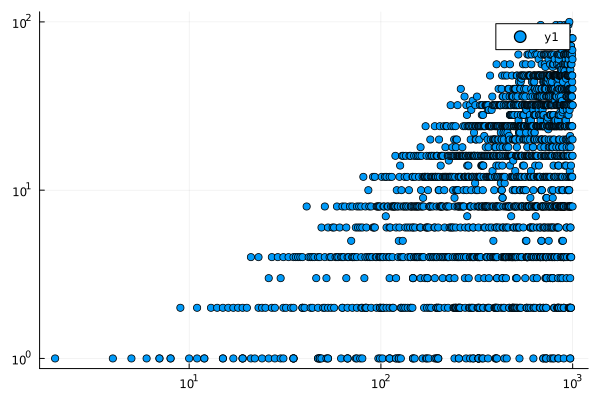

In [34]:
scatter(sicmul[1,:], sicmul[2,:], xaxis=:log, yaxis=:log)

In [16]:
dmax = 1000
sicnum = zeros(Int,dmax)
sicnum[1:3] .= 1
for d in 4:dmax
    D = Δ(d)
    f = sqrt(div((d+1)*(d-3),D)) # so that Δ*f^2 = (d+1)*(d-3), with Δ fundamental
    f = sort(divisors(f))
    ff = map(x -> x^2, f)
    K, a = sic_base_field(d)
    for j = 1:length(ff)
        bOK = [div(a,a); (ff[j]*D + f[j]*a)//2]
        OKf = Order(bOK)
        sicnum[d] += order(picard_group(OKf)[1])
        # println("f = ",f[j])
        # println(picard_group(OKf)[2])
    end
end
sicnum

1000-element Vector{Int64}:
   1
   1
   1
   1
   1
   1
   2
   2
   2
   1
   3
   2
   2
   ⋮
 120
  40
  84
  36
  80
  44
  84
  68
  32
  80
 144
  32

In [11]:
using Plots

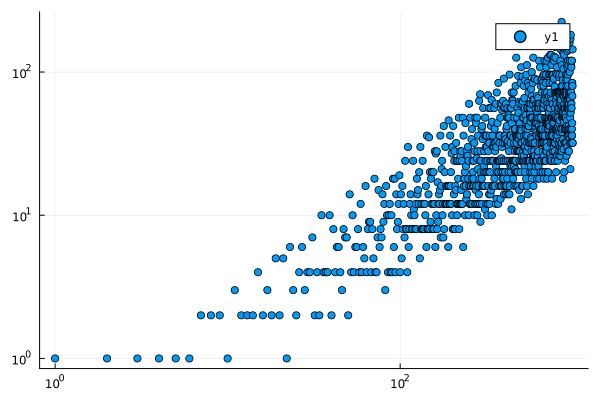

In [17]:
scatter(sicnum, xaxis=:log, yaxis=:log)

In [7]:
sicnum = [1,1,1]
for d in 4:45
    D = Δ(d)
    f = sqrt(div((d+1)*(d-3),D)) # so that Δ*f^2 = (d+1)*(d-3), with Δ fundamental
    f = sort(divisors(f))
    ff = map(x -> x^2, f)
    K, a = sic_base_field(d)
    println("\nd = $d, a = $a")
    for j = 1:length(ff)
        bOK = [div(a,a); (ff[j]*D + f[j]*a)//2]
        OKf = Order(bOK)
        # println("f = ",f[j])
        println("f = $(f[j]), c(OKf) = ",order(picard_group(OKf)[1]))
        # println(picard_group(OKf)[2])
    end
end


d = 4, a = sqrt(5)
f = 1, c(OKf) = 1

d = 5, a = sqrt(12)
f = 1, c(OKf) = 1

d = 6, a = sqrt(21)
f = 1, c(OKf) = 1

d = 7, a = sqrt(8)
f = 1, c(OKf) = 1
f = 2, c(OKf) = 1

d = 8, a = sqrt(5)
f = 1, c(OKf) = 1
f = 3, c(OKf) = 1

d = 9, a = sqrt(60)
f = 1, c(OKf) = 2

d = 10, a = sqrt(77)
f = 1, c(OKf) = 1

d = 11, a = sqrt(24)
f = 1, c(OKf) = 1
f = 2, c(OKf) = 2

d = 12, a = sqrt(13)
f = 1, c(OKf) = 1
f = 3, c(OKf) = 1

d = 13, a = sqrt(140)
f = 1, c(OKf) = 2

d = 14, a = sqrt(165)
f = 1, c(OKf) = 2

d = 15, a = sqrt(12)
f = 1, c(OKf) = 1
f = 2, c(OKf) = 1
f = 4, c(OKf) = 2

d = 16, a = sqrt(221)
f = 1, c(OKf) = 2

d = 17, a = sqrt(28)
f = 1, c(OKf) = 1
f = 3, c(OKf) = 2

d = 18, a = sqrt(285)
f = 1, c(OKf) = 2

d = 19, a = sqrt(5)
f = 1, c(OKf) = 1
f = 2, c(OKf) = 1
f = 4, c(OKf) = 1
f = 8, c(OKf) = 2

d = 20, a = sqrt(357)
f = 1, c(OKf) = 2

d = 21, a = sqrt(44)
f = 1, c(OKf) = 1
f = 3, c(OKf) = 4

d = 22, a = sqrt(437)
f = 1, c(OKf) = 1

d = 23, a = sqrt(120)
f = 1, c(OKf) = 2
f = 2